<a href="https://colab.research.google.com/github/eanchiquep/Machine_Learning_Google_Lab/blob/master/Transformaci%C3%B3n_varianbles__para_conseguir_relaci%C3%B3n_no_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

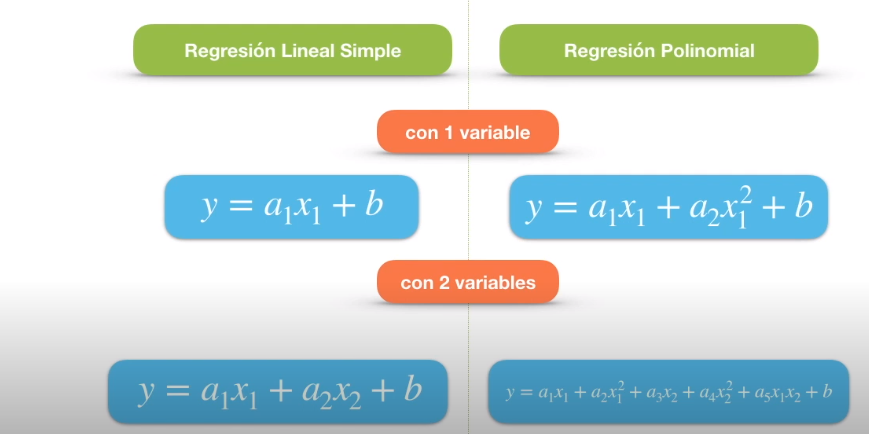

In [ ]:
import pandas as pd

In [ ]:
from google.colab import  drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Machine_learning_udemy/DATASETS/auto
!ls

/content/drive/MyDrive/Colab Notebooks/Machine_learning_udemy/DATASETS/auto
auto-mpg.csv


In [ ]:
data = pd.read_csv('auto-mpg.csv')
data = data.dropna(axis=0)

In [ ]:
data = data.rename({'model year':'model_year'},axis=1)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
402,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
403,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
404,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


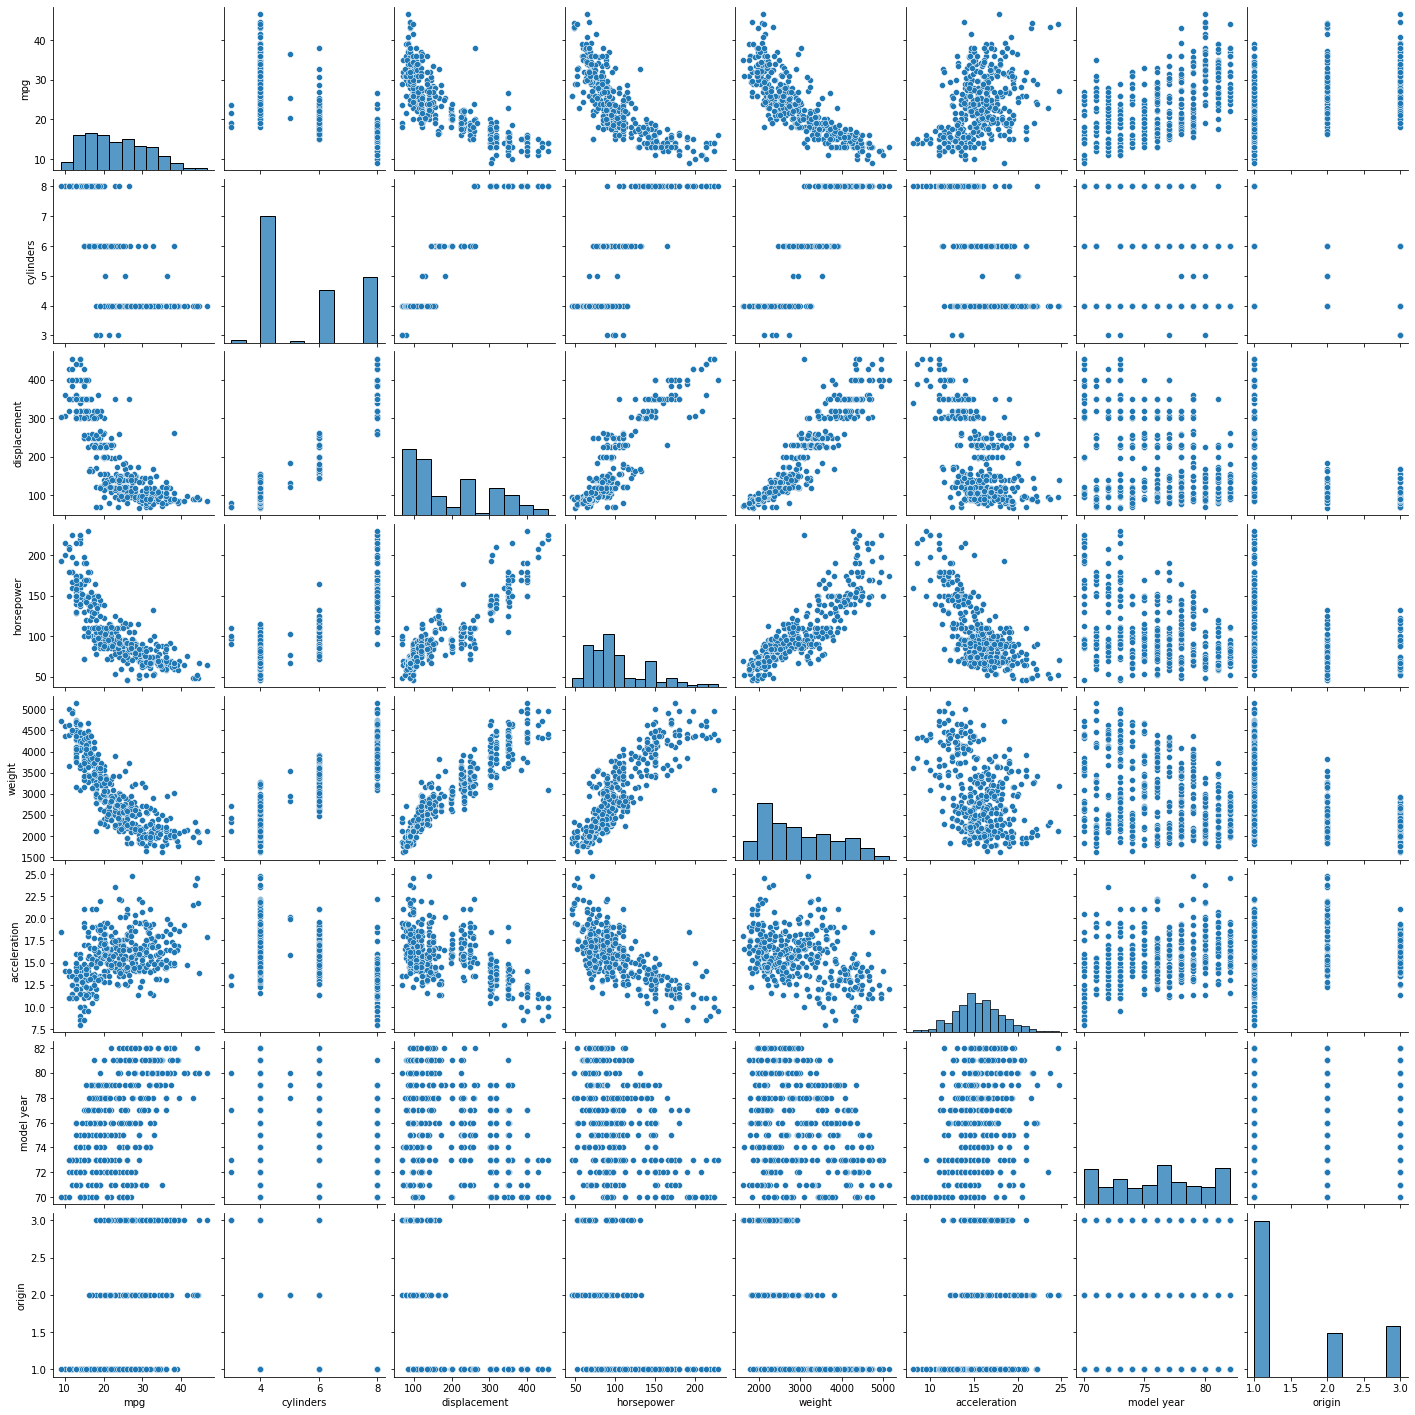

In [ ]:
import seaborn as sbn
sbn.pairplot(data)

In [ ]:
# modelo polinomeal multiple

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

X = data[['horsepower','weight','model_year','origin']]
pol_degree2 = PolynomialFeatures(degree=2)
X = pol_degree2.fit_transform(X)


y = data['mpg']

lm = linear_model.LinearRegression()
lm.fit(X,y)

lm.coef_
lm.score(X,y)
lm.intercept_

261.5709012807635

In [ ]:
# Modelo linear multiple
import statsmodels.formula.api as sfa

lm2 = sfa.ols(formula="mpg~weight+model_year+origin",data=data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     579.2
Date:                Sun, 02 May 2021   Prob (F-statistic):          7.26e-143
Time:                        23:41:52   Log-Likelihood:                -1027.8
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     388   BIC:                             2080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.0459      4.001     -4.510      0.000     -25.913     -10.179
weight        -0.0060      0.000    -23.588      0.000      -0.006      -0.005
model_year     0.7571      0.048     15.668      0.000       0.662       0.852
origin         1.1504      0.259      4.439      0.000       0.641       1.660
==============================================================================
Omnibus:                       39.172   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.003
Skew:                           0.577   Prob(JB):                     3.13e-17
Kurtosis:                       4.823   Cond. No.                     7.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""